# Week 1: Projectile Motion using Euler's Method

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Euler Method

In [3]:
# ---------- Simple projectile motion using Euler's method ---------- #

def proj_euler(speed_m, angle, tau, dimTau=False):

    ''' This code takes dimensional tau values and
    non dimensionalises them using Ts. 
    dimTau = True means the value provided is dimensional while
    dimTau = False means the value provided is non-dimensional '''

    # Dimensionalisation parameters
    G = 9.8  # Acceleration due to gravity (m/s^2)
    Ls = 1  # Choice for scaling length (m)
    Ts = np.sqrt(Ls / G)  # Scale for time (s)

    if dimTau == True:
        tau = tau/Ts # makes tau non dimensional!
        
    #print(tau * Ts)

    # Convert angle to radians
    angle = np.radians(angle)

    # Non-dimensionalise initial speed
    speed = speed_m / (Ls / Ts)

    # Row vectors for non-dimensional position and velocity
    pos = np.array([0, 0])
    vel = speed * np.array([np.cos(angle), np.sin(angle)])

    # Store Initial Condition (for plotting):
    x, y = [pos[0]], [pos[1]]

    # ---- Euler's method ---- #
    
    while pos[1] >= 0:
        
        # Compute one step of Euler's method:
        # First update position using current velocity
        pos = pos + tau * vel
        # Then update velocity with gravity
        vel = vel + tau * np.array([0, -1])

        # Store position for plotting
        x.append(pos[0])
        y.append(pos[1])

    # ---- Estimate Range ---- #

    # Linear interpolation to estimate the range of the projectile
    coOrdsOver = np.array([x[-2], y[-2]])  # Last point projectile above axis
    coOrdsUnder = np.array([x[-1], y[-1]])  # Projectile under ground
    range = coOrdsUnder[0] - coOrdsUnder[1] * (coOrdsUnder[0] - coOrdsOver[0]) / (coOrdsUnder[1] - coOrdsOver[1])
    range_m = Ls * range  # Convert back to m

    # Analytic expression for range
    an_range_m = (speed_m**2 * np.sin(2 * angle)) / G

    return x, y, range_m, an_range_m


In [4]:
#Q1
print(proj_euler(50, 40, 0.1)[2])

252.4486763106218


In [5]:
#Q2
_, _, range, an_range = proj_euler(50, 40, 0.5, True)
print(range)
(range - an_range) / an_range * 100

270.24353344797987


np.float64(7.569690416820783)

In [6]:
def v(t, speed= 100, angle = 45):
    angle = np.radians(angle)
    if t == 0:
        return speed * np.sin(angle), speed*np.cos(angle)
    
    G = 9.8
    
    vy = speed * np.sin(angle) - G * t
    vx = speed * np.cos(angle)

    return (vx, vy)
    


In [7]:
def midpoint_method(f, y0 , t0 , h, speed, angle):
    t = t0
    y = y0
    ts = [t]
    ys = [y]
    while y[1] >= 0:
        k1 = f(t, speed, angle)
        k1 = np.array(k1)
        k2 = f(t + h/2, speed, angle)
        k2 = np.array(k2)
        y = y + h * k2
        t += h
        ts.append(t)
        ys.append(y)
    
    ys= np.array(ys)

    return ts , ys

In [12]:
speed = 50
angle = 40

error = []

for tau in [0.0001, 0.001, 0.01, 0.1, 1]:
    G = -9.8

    Ls = 1  # Choice for scaling length (m)
    Ts = np.sqrt(Ls / -G)  # Scale for time (s)
    tau = tau*Ts # makes tau non dimensional!

    ts, ys = midpoint_method(v, np.array([0, 0]), 0, tau, speed, angle)

    x = ys[:, 0]
    y = ys[:, 1]

    coOrdsOver = np.array([x[-2], y[-2]])  # Last point projectile above axis
    coOrdsUnder = np.array([x[-1], y[-1]])  # Projectile under ground
    range = coOrdsUnder[0] - coOrdsUnder[1] * (coOrdsUnder[0] - coOrdsOver[0]) / (coOrdsUnder[1] - coOrdsOver[1])
    #range_m = Ls * range  # Convert back to m

    # Analytic expression for range
    an_range = (speed**2 * np.sin(2 * angle)) / G

    print(-(range - an_range) / an_range * 100)


0.913673867960465
0.9136738889348289
0.9136788918010695
0.9141934150661085
0.9723606154868164


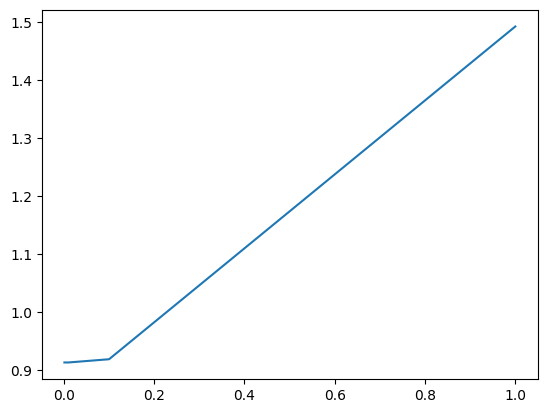

In [86]:
tau = np.linspace(0.001, 1, 1000)
tau = [0.001, 0.01, 0.1, 1]
perc = []

for t in tau:
    G = -9.8
    speed = 50
    angle = 40
    ts, ys= midpoint_method(v, np.array([0, 0]), 0, t, speed, angle)
    x = ys[:, 0]
    y = ys[:, 1]
    coOrdsOver = np.array([x[-2], y[-2]])  # Last point projectile above axis
    coOrdsUnder = np.array([x[-1], y[-1]])  # Projectile under ground
    range = coOrdsUnder[0] - coOrdsUnder[1] * (coOrdsUnder[0] - coOrdsOver[0]) / (coOrdsUnder[1] - coOrdsOver[1])

    an_range = (speed**2 * np.sin(2 * angle)) / G
    p = (range - an_range)/an_range
    perc.append(np.abs(p) * 100)

plt.plot(tau, perc)

## _Q1 (midpoint method):_
### What is the local truncation error in position for the midpoint method?



The local truncation error is $\mathcal{O} (h^3)$. The reason its this is because we compute the first derivative at 2 different points, i.e., we are using some form of the second derivative somewhere in our algorithm. 

## _Q2 (midpoint method):_
### What is the percentage error in the range, compared with the exact analytic value?

## <span style="color:red">Answer</span>

## _Q3 (midpoint method):_
### What is the scaling of the absolute percentage error $E$ with $\tau$?



## _Q4 (midpoint method):_
### Which of the following factors is the dominant source of error you (should have) observed above for the range, $R$?



## _Q5 (Euler method):_
### Determine the range for the Euler's method solution with the non-dimensional time step $\tau=0.01$.



## _Q6 (Euler method):_
### What is the percentage error in Euler's method?



## _Q7 (Euler method):_
### What is the dominant source of error in our estimate of the range using Euler's method as above?



## _Q8 (Euler method):_
### What dimensional time step (in seconds) does the non-dimensional time step $\tau=0.1$ correspond to?



## _Q9 (Euler method):_
### Produce a table with columns of the time step, the Euler's method estimate of the range, and the percentage error in the range by comparison with the analytic formula.



## _Q10 (Euler method):_
### When the value of $\tau$ is increased by a factor of ten, by what factor does the error change?



## _Q11 (Euler method):_
### Briefly outline the relevant argument for how the global error is predicted to scale with $\tau$; complete your answer with a brief statement about why the predicted scaling with $\tau$ is consistent with your results.

